<a href="https://colab.research.google.com/github/AguaClara/CEE4520/blob/master/Unit_Process_Designs/Flocculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flocculation Design Challenge

Learn how to use the AguaClara code distribution and python to design a flocculator!
The [AguaClara code documentation](https://aguaclara.github.io/aguaclara/index.html) will be helpful as you search for useful functions.

30 points total
* 3 for style
* 27 for questions

In [35]:
!pip install aguaclara

In [36]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import matplotlib.pyplot as plt
import numpy as np

Calculate minor loss coefficient for flow around baffles when H/s is small enough so that there is not complete expansion of the flow before the flow contracts again.

0.3919 meter
0.7721 centimeter
Baffle K is 4.008 dimensionless
max H/s is 5.306896551724137


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


5.333333333333332 meter

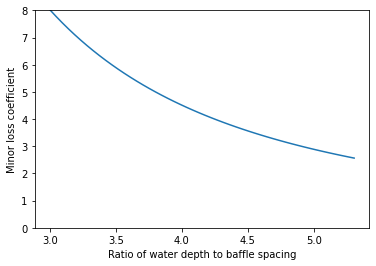

In [37]:
venacontracta = 0.62
ratio_plane_jet_width = 0.116

ratio_vc_baffle = venacontracta**2
height_e = (2.32 - 0.14 - 0.1) * u.m
w_chan = 0.63 * u.m
w_e = ratio_plane_jet_width * height_e/(1 - ratio_vc_baffle)
print(w_e)
q = 60 * u.L/u.s
def Baffle_hl(q,height_e,w_chan,ratio_vc_baffle,ratio_plane_jet_width):
  a = (q/w_chan)**2 / (2 * u.gravity)
  b = (1-ratio_vc_baffle)**2
  c = ratio_vc_baffle * ratio_plane_jet_width*height_e
  return (a * ( b / c )**2).to(u.cm)


baffle_hl = Baffle_hl(q,height_e,w_chan,ratio_vc_baffle,ratio_plane_jet_width)
print(baffle_hl)
baffle_s = 49 * u.cm
ratio_h_s = height_e/baffle_s

@ac.list_handler()
def baffle_k_e(ratio_vc_baffle,ratio_plane_jet_width,ratio_h_s):
  a = (1-ratio_vc_baffle)**2
  b = ratio_vc_baffle * ratio_plane_jet_width * ratio_h_s
  return ((a/b)**2).to(u.dimensionless)

G_1_baffle_K = baffle_k_e(ratio_vc_baffle,ratio_plane_jet_width,ratio_h_s)
print('Baffle K is',G_1_baffle_K) 

# max value of H/s - point of full expansion
ratio_h_s_max = (1 - ratio_vc_baffle)/ratio_plane_jet_width
print('max H/s is',ratio_h_s_max)

h_s_graph = np.linspace(3,ratio_h_s_max) * u.dimensionless

plt.plot(h_s_graph,baffle_k_e(ratio_vc_baffle,ratio_plane_jet_width,h_s_graph))
plt.xlabel('Ratio of water depth to baffle spacing')
plt.ylabel('Minor loss coefficient')
plt.ylim(0,8)

height_e/0.39

Gracias new baffle design
Primer canal, 5 arriba, 4 abajo, canal 2 y 3, son iguales, 8 arriba,7 abajo, canal 4, último, 6 arriba y  5 abajo


In [58]:
def planejetexp(q,baffle_hl,height_e,w_chan,ratio_vc_baffle):
  a = (q/w_chan) / np.sqrt(2 * u.gravity * baffle_hl )
  b = (1-ratio_vc_baffle)**2
  c = ratio_vc_baffle * height_e
  return (a * ( b / c )).to(u.dimensionless)

# G_0 is Gracias original
w_chan = 63 * u.cm
G_0_Expansions_N = 11 + 16 + 2*17 + 3
print('original expansions',G_0_Expansions_N)
G_0_q = 45 * u.L/u.s
G_0_HL_total = 52 * u.cm
G_0_baffle_HL = G_0_HL_total/G_0_Expansions_N

G_0_jetexpandrate = planejetexp(G_0_q,G_0_baffle_HL,height_e,w_chan,ratio_vc_baffle)
print(G_0_jetexpandrate)


#G_1 now repeat for updated design
G_1_Expansions_N = 5+4+1 + 2*(8 + 7 + 1) + 6 + 5
print('Expansions in the new design',G_1_Expansions_N)

# The water is 17 cm from the top of the wall at the beginning of the flocculator. Thus 7 cm less head loss than 50 cm that was designed
G_1_HL_total = 43 * u.cm
G_1_q = 58 * u.L/u.s
G_1_baffle_HL = G_1_HL_total/G_1_Expansions_N

G_1_jetexpandrate = planejetexp(G_1_q,G_1_baffle_HL,height_e,w_chan,ratio_vc_baffle)
print(G_1_jetexpandrate)

(height_e/baffle_s).to(u.dimensionless)
ratio_plane_jet_width = 0.116
height_e = 1.55 * u.m
G_0_predicted_hl = Baffle_hl(G_0_q,height_e,w_chan,ratio_vc_baffle,ratio_plane_jet_width) * G_0_Expansions_N
print('Predicted initial headloss',G_0_predicted_hl)

G_1_predicted_hl = Baffle_hl(G_1_q,height_e,w_chan,ratio_vc_baffle,ratio_plane_jet_width) * G_1_Expansions_N
print('Predicted final headloss',G_1_predicted_hl)

original expansions 64
0.1176 dimensionless
Expansions in the new design 53
0.1517 dimensionless
Predicted initial headloss 50.05 centimeter
Predicted final headloss 68.86 centimeter


In [39]:
# The following are for Gracias
Caudal_max = 60 * u.L/u.s
Floc_canal_W = 63 * u.cm
Floc_aguas_abajo_H = 2.08 * u.m
Floc_canal_L =	7.09 * u.m
Tanque_Entrada_L = 2.09 * u.m
Floc_canal_N = 4
Deflectores_S = 39.2 * u.cm
Deflectores_Ke = 2.56
Expansions_N = 11 + 16 + 2*17 + 3
Floc_perdida_diseño_HL = 50 * u.cm
Floc_volumen = ((Floc_canal_N * Floc_canal_L - Tanque_Entrada_L) * Floc_aguas_abajo_H * Floc_canal_W).to(u.L)
print('Volumen del floculador',Floc_volumen)
t_calculated = (Floc_volumen/Caudal_max).to(u.min)
print('Tiempo de floculacion',t_calculated)

Floc_V = Caudal_max/(Floc_canal_W * Deflectores_S)
Floc_HL = (Expansions_N*Deflectores_Ke * Floc_V**2/(2*u.gravity)).to(u.cm)
print('Perdida de carga en el floculador',Floc_HL)

Temp = 10 * u.degC
nu = ac.viscosity_kinematic_water(Temp)
print('viscosidad de agua',nu)

G = (np.sqrt(u.gravity * Floc_perdida_diseño_HL/(nu * t_calculated))).to(1/u.s)
Gt = (G*t_calculated).to(u.dimensionless)
print('Gradiente de velocidad',G)
print('Gt',Gt)
print('expansions',Expansions_N)
# dato medido por Barbara Oramah on January 57 2020
Floc_HL_medida = 52 * u.cm
Caudal = 45 * u.L/u.s
Floc_V = Caudal/(Floc_canal_W * Deflectores_S)
# calculos
Nuevo_Deflectores_Ke = (Floc_HL_medida/(Expansions_N * Floc_V**2/(2*u.gravity))).to(u.dimensionless)
print('Nueva estimacion del coeficiente de perdida por cada deflector',Nuevo_Deflectores_Ke)
Deflector_hl = (Floc_HL_medida * (Caudal_max / Caudal)**2)/Expansions_N
print('actual head loss per deflector',Deflector_hl)
Deflectores_S_new = 49 * u.cm
Deflectores_n_new = np.trunc((Floc_canal_L/(Deflectores_S_new)).to(u.dimensionless)) * 3 +11
print(Deflectores_n_new)

predicted_design_hl = Deflectores_n_new*baffle_hl
print('head loss predicted for new system is',predicted_design_hl)

Volumen del floculador 3.442e+04 liter
Tiempo de floculacion 9.562 minute
Perdida de carga en el floculador 49.31 centimeter
viscosidad de agua 1.3e-06 meter ** 2 / second
Gradiente de velocidad 81.08 / second
Gt 4.652e+04 dimensionless
expansions 64
Nueva estimacion del coeficiente de perdida por cada deflector 4.8 dimensionless
actual head loss per deflector 1.444 centimeter
53 dimensionless
head loss predicted for new system is 40.92 centimeter


#Calculate head loss in flocculator

In [40]:
Will_floc = ac.Flocculator(q=1*u.L/u.s,temp=15*u.degC,hl=0.5*u.m,l_max=0.6*u.m,end_water_depth=1*u.m,chan_n_parity='even',chan_w_max = 0.5*u.m,ent_l=0*u.m)
print(Will_floc.chan_w)
print(Will_floc.chan_n)
print(Will_floc.chan_l)
print(Will_floc.baffle_s)

53 centimeter
1
0.6 meter
1.758 centimeter


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [41]:
Will_sed=ac.SedimentationTank(q=6*u.L/u.s,temp=15*u.degC,l_inner=1*u.m,w_inner=1*u.m,diffuser_n=15,inlet_man_hl=1*u.cm)
Will_sed=ac.SedimentationTank(q=6*u.L/u.s,temp=15*u.degC,l_inner=1*u.m,w_inner=1*u.m,diffuser_n=15,inlet_man_hl=1*u.cm)
Will_sed.inlet_man_nd.to(u.inch)

/usr/local/lib/python3.6/dist-packages/aguaclara/core/pipes.py:144: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  for i in range(len(np.array(ID_SDR_all_available(SDR)))):
/usr/local/lib/python3.6/dist-packages/aguaclara/core/pipes.py:145: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  if np.array(ID_SDR_all_available(SDR))[i] >= (ID.to(u.inch)).magnitude:


6.0 inch

# Flocculator design

Below we design a flocculator using [aguaclara.design.floc](https://aguaclara.github.io/aguaclara/design/floc.html) in the aguaclara distribution version. We will use the default settings for this design except change the flow rate to 60 L/s. The available inputs (and their default values) that you can change are shown in the [documentation](https://aguaclara.github.io/aguaclara/design/floc.html). You can change any of these parameters by including their keywords in the function call.

$$S = \left( \frac{K}{2 H_e G_{CS}^2 \nu } \right)^\frac{1}{3} \frac{Q}{W_{channel}}$$

In [42]:
flow= 100 * u.L/u.s
Temperature = 0 * u.degC
myF = ac.Flocculator(q=flow,ent_l=0*u.m,temp=Temperature,hl=40*u.cm,l_max =7*u.m)

print('The number of channels is', myF.chan_n)
print('The channel length is',myF.chan_l)
print('The channel width is',ac.round_sig_figs(myF.chan_w,3))
print('The spacing between baffles is',ac.round_sig_figs(myF.baffle_s,2))
print('The number of obstacles per baffle is', myF.obstacle_n)
print('The velocity gradient is', ac.round_sig_figs(myF.vel_grad_avg,2))
print('The residence time used for design is',ac.round_sig_figs(myF.retention_time,2))
print('The maximum distance between flow expansions is', ac.round_sig_figs(myF.expansion_h_max,2))
#print('The drain diameter is', myF.drain_nd)
print('Velocity',(flow/(myF.chan_w * myF.baffle_s)).to(u.m/u.s))
print('The Gt is',myF.gt)

Floc_total_L = myF.chan_l *myF.chan_n - myF.ent_l
Expansions_n = np.floor((Floc_total_L / myF.baffle_s * myF.expansion_n).to(u.dimensionless))
print('There are',Expansions_n.magnitude,'flow expansions.')

v = myF.q/(myF.baffle_s * myF.chan_w)
Expansion_HL = (myF.BAFFLE_K * (v**2) / (2 * u.standard_gravity)).to(u.cm)
print('The head loss per flow expansions is', ac.round_sig_figs(Expansion_HL,3))

Floc_headloss = Expansion_HL * Expansions_n
print('The total head loss in the flocculator is', ac.round_sig_figs(Floc_headloss,2))
PiHS = ((myF.end_water_depth/(myF.obstacle_n+1))/myF.baffle_s).to(u.dimensionless)
print('The H/S ratio is',PiHS)

ValueError: ignored

In [ ]:
n = 50
mytemp = 15*u.degC
GraphQ = np.linspace(0.001,1,n)*800*u.L/u.s
myFs =np.empty(n, dtype=type(myF))
residencetimes = np.empty(n)*u.s
gradients = np.empty(n)*u.Hz
bafflespacing = np.empty(n)*u.cm
channels = np.empty(n)
channel_w = np.empty(n)*u.cm
for i in range(n):
  myFs[i] = ac.Flocculator(q=GraphQ[i],temp = mytemp,end_water_depth=4*u.m)
  residencetimes[i] = myFs[i].retention_time
  gradients[i] = myFs[i].vel_grad_avg
  bafflespacing[i] = myFs[i].baffle_s
  channels[i] = myFs[i].chan_n
  channel_w[i] = myFs[i].chan_w


plt.plot(GraphQ, residencetimes  ,'-');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('Residence time (s)');
plt.show()

plt.plot(GraphQ, gradients  ,'-');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('Velocity gradients (Hz)');
plt.show()

plt.plot(GraphQ, bafflespacing  ,'o');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('Baffle spacing (cm)');
plt.show()

plt.plot(GraphQ, channels  ,'o');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('channels');
plt.show()

plt.plot(GraphQ, channel_w  ,'o');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('channel width (cm)');
plt.show()

In [ ]:
(ac.ID_sch40(1*u.inch)).to(u.cm)

In [60]:
225 * 0.25/3

18.75